# <html>

    
<div  style="background-color:w; color:#636363;border:#63b365; border-width:5px; border-style:solid;">

    
<p><center><img src="https://drive.google.com/thumbnail?id=1yPGYO8HkTanlqsIXozDIUvUVuvawAdG_" width ="6%"  /><font size=8> <b>Modelo Preditivo Doenças Hepáticas</b></font> </p>
<p ><font size=6><center>Ives Tulio</font> </p>
<p ><font size=4><center><b>email:</b> ivestulio@gmail.com <br> 
<b>Linkedin:</b> in/ives-tulio/<br>
<b>GitHub:</b> ivestulio</p>

</div>



**Descrição Dados:**
* Resultados de Sangue de 615 pacientes,
* De ambos os sexos 
* com idade entre 19 e 77 anos 
* divididos em:
> * Doadores de sangue 
> * Cirrose 
> * Hepatite 
> * Fibroses 
> * doadores de sangue suspeitos

**Avaliações:**

> 1. Há relação entre o sexo e doenças hepáticas ?
> 2. Qual faixa etária é mais acometida por doenças hepáticas ?
> 3. Qual a relação entre as doenças hepáticas e os resultados do exame de sangue ?

<div style="background-color:#99EEAA; color:#000066;">
    <h2><center>Bibliotecas:</center></h2>
</div>

In [1]:
# Manipulação de Dados:

import pandas as pd 
import numpy as np

# Visualização Gráfica:

import matplotlib.pyplot as plt
import seaborn as sns 

#Pré-processamento de dados:
from sklearn.model_selection import train_test_split
from  sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Modelos 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier


<div style="background-color:#99EEAA; color:#000066;">
    <h2><center>Importando os Dados:</center></h2>
</div>


In [2]:
ds = pd.read_csv("../input/hepatitis-c-dataset/HepatitisCdata.csv")
ds.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [3]:
print(ds.describe())

       Unnamed: 0         Age         ALB         ALP         ALT         AST  \
count  615.000000  615.000000  614.000000  597.000000  614.000000  615.000000   
mean   308.000000   47.408130   41.620195   68.283920   28.450814   34.786341   
std    177.679487   10.055105    5.780629   26.028315   25.469689   33.090690   
min      1.000000   19.000000   14.900000   11.300000    0.900000   10.600000   
25%    154.500000   39.000000   38.800000   52.500000   16.400000   21.600000   
50%    308.000000   47.000000   41.950000   66.200000   23.000000   25.900000   
75%    461.500000   54.000000   45.200000   80.100000   33.075000   32.900000   
max    615.000000   77.000000   82.200000  416.600000  325.300000  324.000000   

              BIL         CHE        CHOL         CREA         GGT        PROT  
count  615.000000  615.000000  605.000000   615.000000  615.000000  614.000000  
mean    11.396748    8.196634    5.368099    81.287805   39.533171   72.044137  
std     19.673150    2.2056

In [4]:
ds['Category'].value_counts()

0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: Category, dtype: int64

In [5]:
ds['Sex'].value_counts()

m    377
f    238
Name: Sex, dtype: int64

<div style="background-color:#99EEAA; color:#000066;">
    <h2><center> Tratamento dos Dados:  </center></h2>
</div>


In [6]:
# Excluindo valores nulos (na):
ds.dropna(inplace= True)
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 612
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  589 non-null    int64  
 1   Category    589 non-null    object 
 2   Age         589 non-null    int64  
 3   Sex         589 non-null    object 
 4   ALB         589 non-null    float64
 5   ALP         589 non-null    float64
 6   ALT         589 non-null    float64
 7   AST         589 non-null    float64
 8   BIL         589 non-null    float64
 9   CHE         589 non-null    float64
 10  CHOL        589 non-null    float64
 11  CREA        589 non-null    float64
 12  GGT         589 non-null    float64
 13  PROT        589 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 69.0+ KB


In [7]:
# Separar os dados entre as pessoas Saudáveis e as Doentes:
ds["Category"].loc[ds["Category"].isin(["1=Hepatitis",'2=Fibrosis','3=Cirrhosis'])] = 1
ds["Category"].loc[ds['Category'].isin(['0=Blood Donor',"0s=suspect Blood Donor"])] = 0 

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<div style="background-color:#99EEAA; color:#000066;">
    <h2><center> Visualização dos Dados:  </center></h2>
</div>


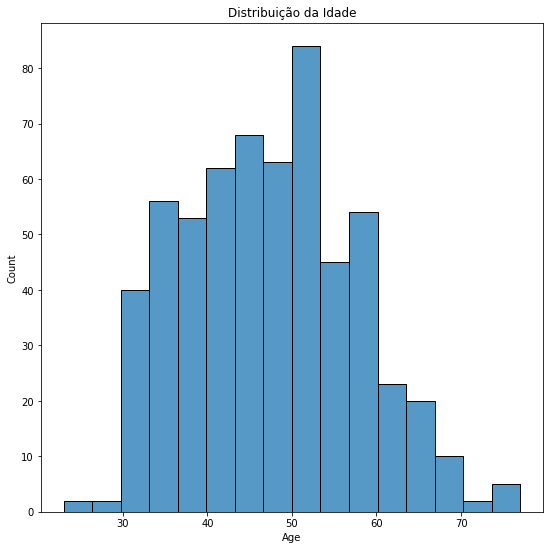

In [8]:
plt.figure(figsize=(9,9))
sns.histplot(ds["Age"])
plt.title('Distribuição da Idade')
plt.show()

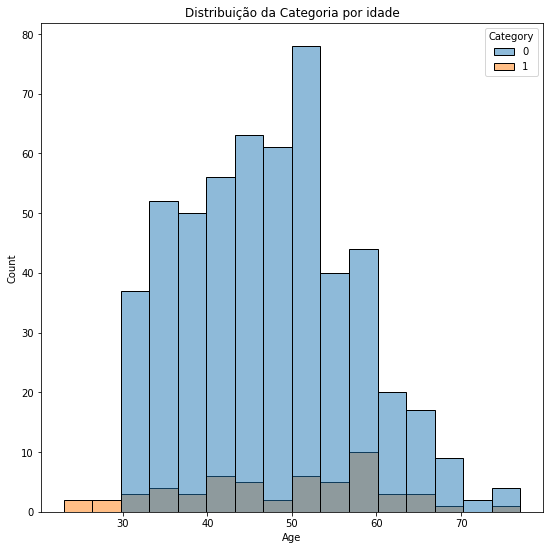

In [9]:
plt.figure(figsize=(9,9))
sns.histplot(ds[['Age', 'Category']], x = "Age", hue="Category")
plt.title("Distribuição da Categoria por idade")
plt.show()

In [10]:
# Separando os dados por Sexo:
dh = ds.loc[ds.Sex == 'm']
dm = ds.loc[ds.Sex == 'f']

In [11]:
dh['Category'].value_counts(normalize=True)

0    0.889807
1    0.110193
Name: Category, dtype: float64

In [12]:
dm['Category'].value_counts(normalize=True)

0    0.929204
1    0.070796
Name: Category, dtype: float64

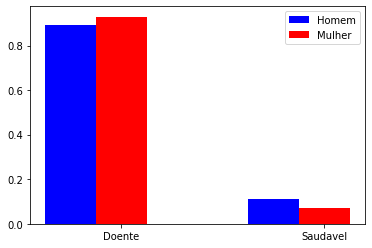

In [13]:
x = np.arange(2)
barWidht = 0.25
plt.bar(x,dh['Category'].value_counts(normalize=True),width=0.25, color= 'b',label = "Homem" )
plt.bar(x+barWidht,dm['Category'].value_counts(normalize=True), width= 0.25, color='r', label="Mulher")
local = x+barWidht
labels = ['Doente','Saudavel']
plt.xticks(local,labels)
plt.legend()

Text(0.5, 0.98, 'Análise Hepatite C')

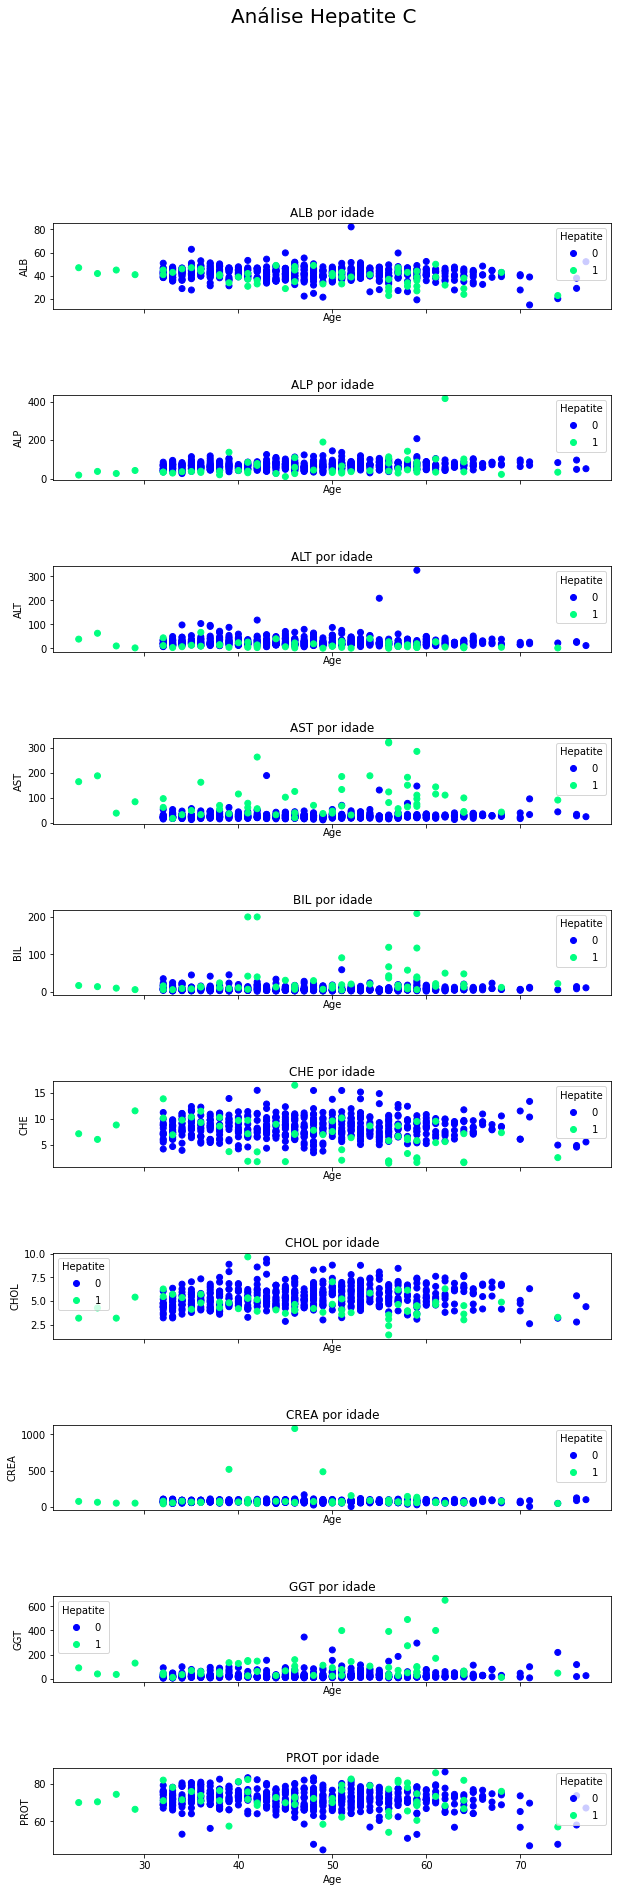

In [14]:
colunas = ds.columns[4:]
fig, ax = plt.subplots(nrows=len(colunas), ncols=1, sharex=True, figsize = (10,30))
X = ds['Age']
for i in range(len(colunas)):
  y = ds[colunas[i]]
  scatter = ax[i].scatter(x = X, y = y, c = ds['Category'], cmap='winter')
  ax[i].set(title=f'{colunas[i]} por idade', xlabel="Age", ylabel=colunas[i])
  ax[i].legend(*scatter.legend_elements(), title = 'Hepatite')
plt.subplots_adjust(hspace=1)
fig.suptitle("Análise Hepatite C", size= 20)

In [15]:
ds["Sex"] = ds['Sex'].map({'m':1,'f':2})
ds.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [16]:
ds['Category']=ds['Category'].astype(float)

In [17]:
ds=ds.drop('Unnamed: 0', axis=1)

<AxesSubplot:>

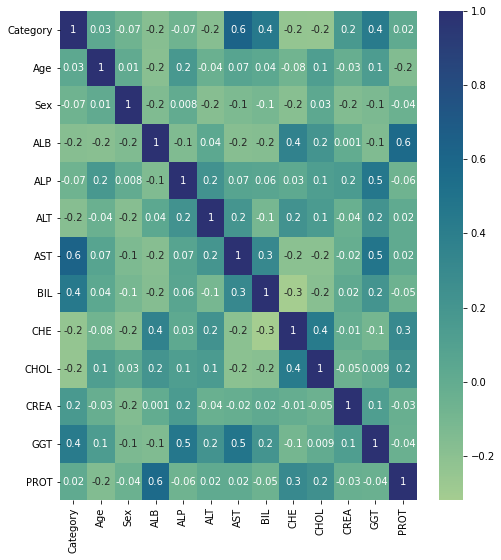

In [18]:
# Correlação entre os Dados:
 
fig, ax = plt.subplots(figsize=(8,9))
sns.heatmap(ds.corr(), annot=True, fmt='.1g', cmap="crest")

In [19]:
print ( f'Total de Pacientes Suspeitos: {ds.Category.value_counts()[1]}')
print(f'Total de Pacientes Saudáveis: {ds.Category.value_counts()[0]}')

Total de Pacientes Suspeitos: 56
Total de Pacientes Saudáveis: 533


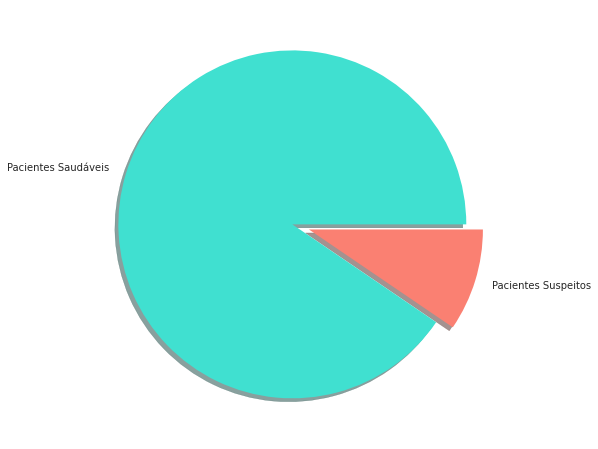

In [20]:
# Comparação entre pacientes Saudáveis e suspeitos:

plt.style.use('seaborn')
fig,ax = plt.subplots(figsize=(8,8))
plt.pie(x= ds['Category'].value_counts(),
        colors=['turquoise','salmon'],
        labels=['Pacientes Saudáveis',"Pacientes Suspeitos"],
        shadow= True,
        explode = (0,0.1)
        
        )
plt.show()

In [21]:
ds.Sex.value_counts()

1    363
2    226
Name: Sex, dtype: int64

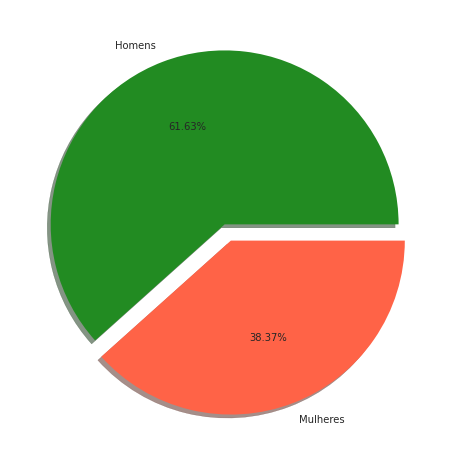

In [22]:
plt.style.use('seaborn')
fig,ax = plt.subplots(figsize=(8,8))
plt.pie(x=ds['Sex'].value_counts(),
        colors=["forestgreen",'tomato'],
        labels=["Homens", "Mulheres"],
        shadow = True,
        autopct ="%1.2f%%",
        explode=(0,0.1)
)
plt.show()

<div style="background-color:#99EEAA; color:#000066;">
    <h2><center>Modelagem:</center></h2>
</div>

Dividindo os Dados de Treino e Teste:

In [23]:
 # X
X = ds.drop("Category",axis=1)
X.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,1,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,1,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,1,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [24]:
# Y 
y = ds['Category']
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Category, dtype: float64

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)


In [26]:
len(x_test), len(x_train)

(118, 471)

In [27]:
# Scalando os dados:

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

<div style="background-color:#99EEAA; color:#000066;">
    <h3><center>Regressão Logística</center></h3>
</div>
 

In [28]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [29]:
LogisticRegressionScore = lr.score(x_test, y_test)
print(f'Precisão do modelo LogisticRegression: {LogisticRegressionScore}')

Precisão do modelo LogisticRegression: 0.9576271186440678


<div style="background-color:#99EEAA; color:#000066;">
    <h4><center>Confussion Matrix para RL</center></h4>
</div>


<AxesSubplot:>

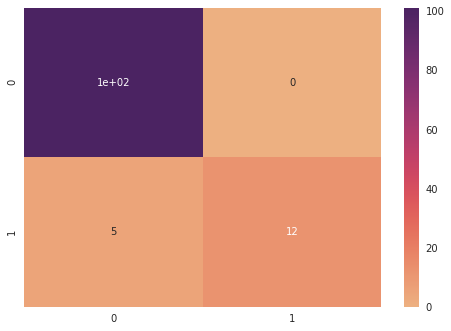

In [30]:
y_pred_lr = lr.predict(x_test)
matrix_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(matrix_lr, annot=True, cmap='flare')

In [31]:
# Dados precisão do modelo:

print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98       101
         1.0       1.00      0.71      0.83        17

    accuracy                           0.96       118
   macro avg       0.98      0.85      0.90       118
weighted avg       0.96      0.96      0.95       118



<div style="background-color:#99EEAA; color:#000066;">
    <h3><center> Random Forest Classifier  </center></h3>
</div>



In [32]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [33]:
RandomForestClassifierScore = rfc.score(x_test, y_test)
print(f'Precisão do modelo RandomForestClassifier: {RandomForestClassifierScore}')

Precisão do modelo RandomForestClassifier: 0.9491525423728814


<div style="background-color:#99EEAA; color:#000066;">
    <h4><center> Confusion Matrix para RFC  </center></h4>
</div>


<AxesSubplot:>

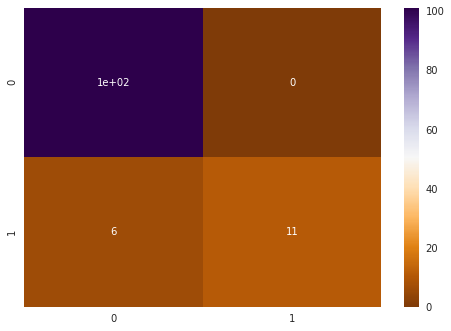

In [34]:
y_pred_rfc = rfc.predict(x_test)
matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(matrix_rfc, annot=True, cmap="PuOr")

In [35]:
print(metrics.classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       101
         1.0       1.00      0.65      0.79        17

    accuracy                           0.95       118
   macro avg       0.97      0.82      0.88       118
weighted avg       0.95      0.95      0.94       118



<div style="background-color:#99EEAA; color:#000066;">
    <h3><center> K Neighbors Classifier:  </center></h3>
</div>
 

In [36]:
knc = KNeighborsClassifier()
knc.fit(x_train, y_train)

KNeighborsClassifier()

In [37]:
KNeighborsClassifierScore = knc.score(x_test, y_test)
print(f'Precisão do Modelo KNC: {KNeighborsClassifierScore}')

Precisão do Modelo KNC: 0.9322033898305084


<div style="background-color:#99EEAA; color:#000066;">
    <h4><center>Confusion Matrix para KNC   </center></h4>
</div>


<AxesSubplot:>

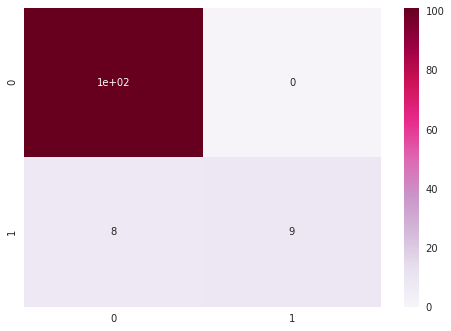

In [38]:
y_pred_knc = knc.predict(x_test)
matrix_knc = confusion_matrix(y_test, y_pred_knc)
sns.heatmap(matrix_knc, annot=True, cmap='PuRd')

In [39]:
print(metrics.classification_report(y_test,y_pred_knc))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96       101
         1.0       1.00      0.53      0.69        17

    accuracy                           0.93       118
   macro avg       0.96      0.76      0.83       118
weighted avg       0.94      0.93      0.92       118



<div style="background-color:#99EEAA; color:#000066;">
    <h3><center> Decision Tree Classifier:  </center></h3>
</div>


In [40]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [41]:
DecisionTreeClassifierScore = tree.score(x_test, y_test)
print(f'Precisão do modelo DTC: {DecisionTreeClassifierScore}')

Precisão do modelo DTC: 0.940677966101695



<div style="background-color:#99EEAA; color:#000066;">
    <h4><center>   Confusion Matrix para DTC </center></h4>
</div>

<AxesSubplot:>

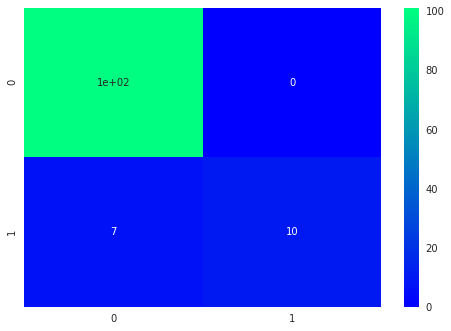

In [42]:
y_pred_tree = tree.predict(x_test)
matrix_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(matrix_tree, annot=True, cmap='winter')

In [43]:
print(metrics.classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       101
         1.0       1.00      0.59      0.74        17

    accuracy                           0.94       118
   macro avg       0.97      0.79      0.85       118
weighted avg       0.94      0.94      0.93       118




<div style="background-color:#99EEAA; color:#000066;">
    <h3><center>  CatBoost Classifier: </center></h3>
</div>

In [44]:
cat = CatBoostClassifier(iterations= 10)
cat.fit(x_train, y_train)

Learning rate set to 0.5
0:	learn: 0.3991804	total: 53.2ms	remaining: 479ms
1:	learn: 0.2753486	total: 55.2ms	remaining: 221ms
2:	learn: 0.1954765	total: 57ms	remaining: 133ms
3:	learn: 0.1492212	total: 58.7ms	remaining: 88ms
4:	learn: 0.1179036	total: 60.6ms	remaining: 60.6ms
5:	learn: 0.0916512	total: 63.6ms	remaining: 42.4ms
6:	learn: 0.0731898	total: 66.3ms	remaining: 28.4ms
7:	learn: 0.0608813	total: 69.9ms	remaining: 17.5ms
8:	learn: 0.0529468	total: 73ms	remaining: 8.11ms
9:	learn: 0.0469205	total: 76.3ms	remaining: 0us


In [45]:
CatBoostClassifierScore= cat.score(x_test,y_test)
print(f'Precisão do modelo CBC: {CatBoostClassifierScore}')

Precisão do modelo CBC: 0.9576271186440678


<div style="background-color:#99EEAA; color:#000066;">
    <h4><center> Confusion Matrix para CBC:  </center></h4>
</div>

<AxesSubplot:>

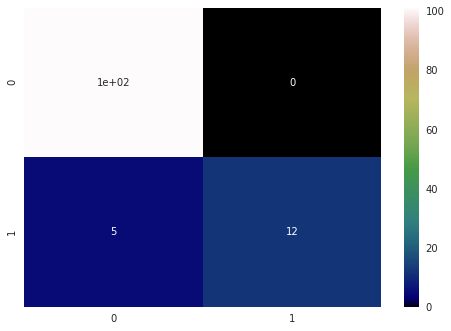

In [46]:
y_pred_cat = cat.predict(x_test)
matrix_cat = confusion_matrix(y_test, y_pred_cat)
sns.heatmap(matrix_cat, annot=True, cmap='gist_earth')

In [47]:
print(metrics.classification_report(y_test,y_pred_cat))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98       101
         1.0       1.00      0.71      0.83        17

    accuracy                           0.96       118
   macro avg       0.98      0.85      0.90       118
weighted avg       0.96      0.96      0.95       118




<div style="background-color:#99EEAA; color:#000066;">
    <h3><center> Gradient Boosting Classifier:  </center></h3>
</div>

In [48]:
gbc =  GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [49]:
GradientBoostingClassifierScore = gbc.score(x_test,y_test)
print(f'Precisão do modelo GBC: {GradientBoostingClassifierScore}')

Precisão do modelo GBC: 0.9491525423728814



<div style="background-color:#99EEAA; color:#000066;">
    <h4><center>   Confusion Matrix para GBC: </center></h4>
</div>

<AxesSubplot:>

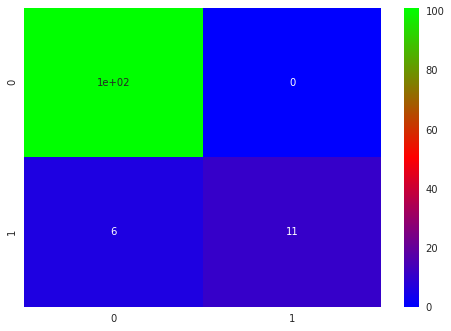

In [50]:
y_pred_gbc = gbc.predict(x_test)
matrix_gbc = confusion_matrix(y_test,y_pred_gbc)
sns.heatmap(matrix_gbc, annot=True, cmap='brg')

In [51]:
print(metrics.classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       101
         1.0       1.00      0.65      0.79        17

    accuracy                           0.95       118
   macro avg       0.97      0.82      0.88       118
weighted avg       0.95      0.95      0.94       118




<div style="background-color:#99EEAA; color:#000066;">
    <h2><center> Comparando Modelos:  </center></h2>
</div>

Text(0.5, 1.0, 'Comparação de Modelos')

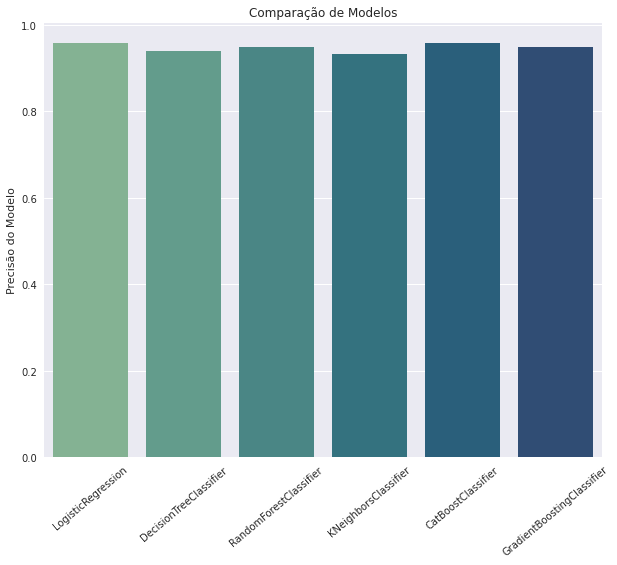

In [52]:
plt.style.use('seaborn')

X = ['LogisticRegression', 
     "DecisionTreeClassifier",
     'RandomForestClassifier',
     "KNeighborsClassifier",
     'CatBoostClassifier',
     'GradientBoostingClassifier']

y = [LogisticRegressionScore, 
     DecisionTreeClassifierScore,
     RandomForestClassifierScore,
     KNeighborsClassifierScore,
     CatBoostClassifierScore,
     GradientBoostingClassifierScore]

fig,ax= plt.subplots(figsize=(10,8))
sns.barplot(x=X, y=y, palette='crest')
plt.ylabel('Precisão do Modelo')
plt.xticks(rotation=40)
plt.title('Comparação de Modelos')



<div style="background-color:#99EEAA; color:#000066;">
    <h2><center> Relatório Final:  </center></h2>
</div>

* O modelo de classificação que apresentou melhor performance tendo como parâmentro a precisão foi o CatBoostClassifier.